<a href="https://colab.research.google.com/github/ibtihelgharsalah/Email-Sentiment-Analysis/blob/main/Data_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libs
  

In [ ]:
!pip install torch>=1.6.0 transformers>=4.0.0 sentencepiece

In [ ]:
!pip install simpletransformers>=0.61.10

In [ ]:
!pip install nltk>=3.4.5

In [ ]:
!pip install numpy requests nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



# Blind Machine learning


In [ ]:
import pandas as pd
import matplotlib as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ALL.xlsx.xlsx')

#Data Processing


In [ ]:
df['Label'] = pd.factorize(df['Label'])[0]
df

,Body,Label
0,Attached is a revised Credit Watch listing for...,0
1,Continental has a price of $297.17(non-refunda...,1
2,You hurt my feelings bc you didn't wait for my...,0
3,Attached is the final notification report for ...,1
4,The basic reason we are changing meters in Si...,1
...,...,...
42624,"Thank you, I appreciate it.",1
42625,Thanks Daryna â€“ you too!,1
42626,Sorry Alex â€“ could you also explain why the ...,0
42627,"Sergey, itâ€™s working.Â Thanks. Feel free to...",1


In [ ]:
df.isnull().sum()

Body     0
Label    0
dtype: int64

In [ ]:
neg=df.groupby("Label").count()['Body'][0]
pos=df.groupby("Label").count()['Body'][1]

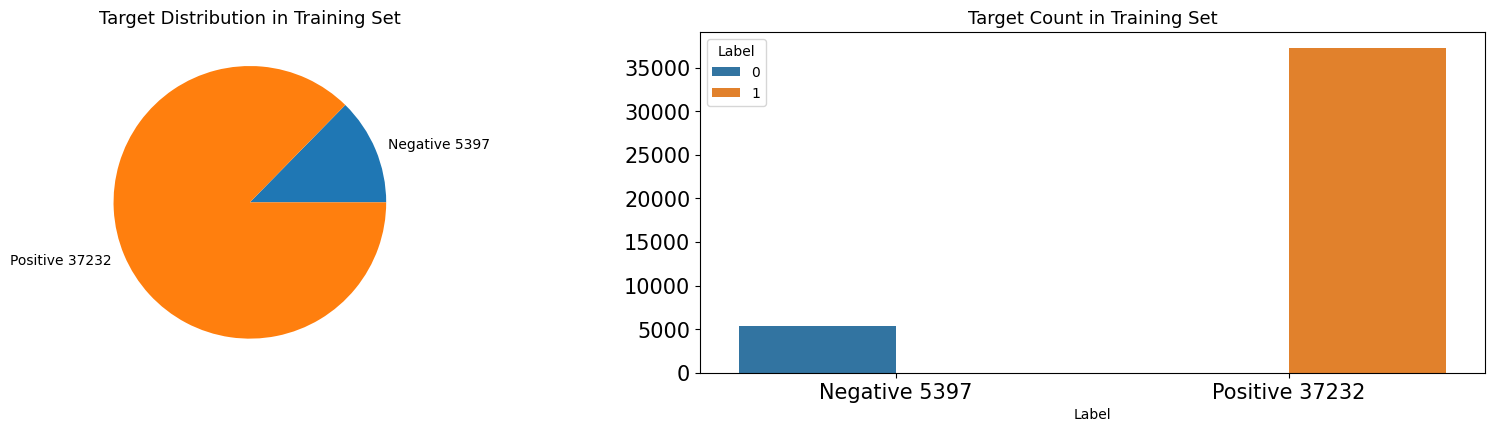

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

df.groupby('Label').count()["Body"].plot(kind='pie', ax=axes[0],labels=[f'Negative {neg}', f'Positive {pos}'])
sns.countplot(x=df['Label'], hue=df['Label'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels([f'Negative {neg}', f'Positive {pos}'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()

It seems like that our dataset is not Balanced let's try to balance them 

In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [ ]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2022-06-29 08:34:52--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.42.246
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.42.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94 [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]      94  --.-KB/s    in 0s      

2022-06-29 08:34:52 (4.07 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [94/94]



In [ ]:
!gzip -d GoogleNews-vectors-negative300.bin.gz

gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? y


In [ ]:
!pip install word2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nlpaug.util.file.download import DownloadUtil

In [ ]:
!pip install librosa>=0.7.1 matplotlib

In [ ]:
df = df[df['Label'] == 0]

In [ ]:
df

,Unnamed: 0,Body,Label
0,0,ETS 103 PGG 28 EREC 53.2 Azurix (not including...,0
1,1,It is actually $45 million. I would need I rev...,0
2,2,Corp has been showing a previos IBIT of a posi...,0
3,3,Stan needs to see before we turn into Corp. or...,0
4,4,"Steve, FYI, the Risk Management and Reporting ...",0
...,...,...,...
3963,3963,space corp corporation has been showing a prev...,0
3964,3964,it is still actually $ 45 million. nothing i w...,0
3965,3965,actually it is actually $ 45 5 million. i woul...,0
3966,3966,ets 103 pgg 28 erec 53. 2 with azurix ( althou...,0


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2.csv')
df

,Unnamed: 0,Body,Label
0,0,ETS 103 PGG 28 EREC 53.2 Azurix (not including...,0
1,1,It is actually $45 million. I would need I rev...,0
2,2,Corp has been showing a previos IBIT of a posi...,0
3,3,Stan needs to see before we turn into Corp. or...,0
4,4,"Steve, FYI, the Risk Management and Reporting ...",0
...,...,...,...
3963,3963,space corp corporation has been showing a prev...,0
3964,3964,it is still actually $ 45 million. nothing i w...,0
3965,3965,actually it is actually $ 45 5 million. i woul...,0
3966,3966,ets 103 pgg 28 erec 53. 2 with azurix ( althou...,0


In [ ]:
df['Label'] = pd.factorize(df['Label'])[0]
df

,Unnamed: 0,Body,Label
0,0,ETS 103 PGG 28 EREC 53.2 Azurix (not including...,0
1,1,It is actually $45 million. I would need I rev...,0
2,2,Corp has been showing a previos IBIT of a posi...,0
3,3,Stan needs to see before we turn into Corp. or...,0
4,4,"Steve, FYI, the Risk Management and Reporting ...",0
...,...,...,...
3963,3963,space corp corporation has been showing a prev...,0
3964,3964,it is still actually $ 45 million. nothing i w...,0
3965,3965,actually it is actually $ 45 5 million. i woul...,0
3966,3966,ets 103 pgg 28 erec 53. 2 with azurix ( althou...,0


In [ ]:
# model_type: word2vec, glove or fasttext
import numpy as np
test=False
i,j=933,0
k=0
while(test == False):  
  aug = naw.ContextualWordEmbsAug(
      model_path='bert-base-uncased', action="insert")
    
  augmented_text = aug.augment(df['Body'][i])
  row=[augmented_text ,df['Label'][i]]
  df=pd.DataFrame(np.insert(df.values,415,row,axis=0),columns=["Body","Label"])
  df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/2.csv', index=True)
  j=j+1
  print(j)

  if(j==833):
    test=True
  if k==1:
    i=i+1
    k=-1
  k=k+1  

TypeError: ignored